METEORITES LANDING ON EARTH DATA ANALYSIS AND FUTURE PREDICTION MODEL USING RANDOM FOREST REGRESSOR DEVELOPED BY RAJARSHI DEY FOR THE CAPSTONE PROJECT OF AICTE INTERNSHIP BY EDUNET FOUNDATION.

In [2]:
import pandas as pd

# Load the data
file_path = 'meteorite-landings.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


name   id nametype     recclass      mass  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong               GeoLocation  
0    6.08333     (50.775000, 6.083330)  
1   10.23333    (56.183330, 10.233330)  
2 -113.00000  (54.216670, -113.000000)  
3  -99.90000   (16.883330, -99.900000)  
4  -64.95000  (-33.166670, -64.950000)

In [3]:
# Basic information about the dataset
data.info()

# Summary statistics of numerical columns
data.describe()

# Checking for unique values in categorical columns
print("Unique values in 'fall':", data['fall'].unique())
print("Unique values in 'nametype':", data['nametype'].unique())
print("Unique values in 'recclass':", data['recclass'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
Unique values in 'fall': ['Fell' 'Found']
Unique values in 'nametype': ['Valid' 'Relict']
Unique values in 'recclass': 466


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing critical values
data.dropna(subset=['reclat', 'reclong', 'year'], inplace=True)

# Fill missing values in 'mass' with the median mass
data['mass'].fillna(data['mass'].median(), inplace=True)

# Verify that there are no remaining missing values
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values in each column:
 name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64
Missing values after cleaning:
 name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_3352\1744660157.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mass'].fillna(data['mass'].median(), inplace=True)


In [5]:
import numpy as np

# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in 'mass'
outliers_mass = detect_outliers(data, 'mass')
print(f"Number of outliers in 'mass': {outliers_mass.shape[0]}")

# Remove outliers from 'mass'
data = data[~data.index.isin(outliers_mass.index)]

# Verify that outliers have been removed
print(f"Number of outliers in 'mass' after removal: {detect_outliers(data, 'mass').shape[0]}")


Number of outliers in 'mass': 6095
Number of outliers in 'mass' after removal: 3870


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode 'fall' and 'nametype' using label encoding
label_encoder = LabelEncoder()
data['fall'] = label_encoder.fit_transform(data['fall'])
data['nametype'] = label_encoder.fit_transform(data['nametype'])

# Verify the encoding
data.head()


name    id  nametype       recclass    mass  fall    year  \
0            Aachen     1         1             L5   21.00     0  1880.0   
12  Aire-sur-la-Lys   425         1        Unknown   29.09     0  1769.0   
17          Al Rais   446         1         CR2-an  160.00     0  1957.0   
22  Alby sur Chéran   458         1  Eucrite-mmict  252.00     0  2002.0   
38           Angers  2301         1             L6   29.09     0  1822.0   

      reclat   reclong             GeoLocation  
0   50.77500   6.08333   (50.775000, 6.083330)  
12  50.66667   2.33333   (50.666670, 2.333330)  
17  24.41667  39.51667  (24.416670, 39.516670)  
22  45.82133   6.01533   (45.821330, 6.015330)  
38  47.46667  -0.55000  (47.466670, -0.550000)

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize 'mass'
data['mass'] = scaler.fit_transform(data[['mass']])

# Verify normalization
data[['mass']].describe()


mass
count  3.213100e+04
mean   5.661166e-17
std    1.000016e+00
min   -6.481110e-01
25%   -5.946822e-01
50%   -4.526655e-01
75%    9.665306e-02
max    4.177480e+00

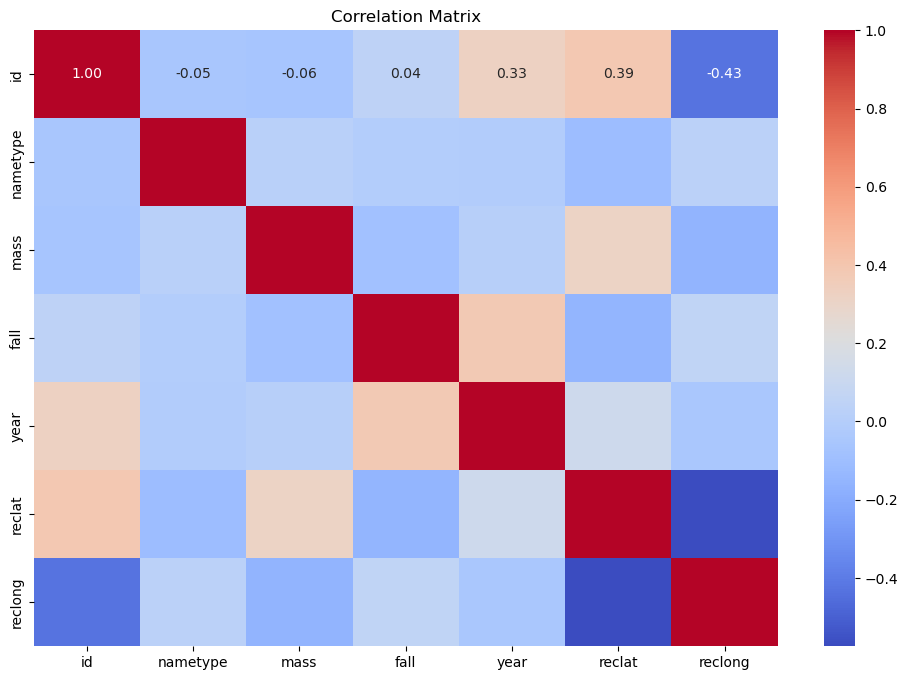

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Summary Statistics:
           name            id      nametype recclass          mass  \
count    32131  32131.000000  32131.000000    32131  3.213100e+04   
unique   32131           NaN           NaN      363           NaN   
top     Aachen           NaN           NaN       L6           NaN   
freq         1           NaN           NaN     6352           NaN   
mean       NaN  25971.921851      0.997853      NaN  5.661166e-17   
std        NaN  17301.293430      0.046292      NaN  1.000016e+00   
min        NaN      1.000000      0.000000      NaN -6.481110e-01   
25%        NaN  11356.500000      1.000000      NaN -5.946822e-01   
50%        NaN  22222.000000      1.000000      NaN -4.526655e-01   
75%        NaN  40300.500000      1.000000      NaN  9.665306e-02   
max        NaN  57458.000000      1.000000      NaN  4.177480e+00   

                fall          year        reclat       reclong  \
count   32131.000000  32131.000000  32131.000000  32131.000000   
unique           N

c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


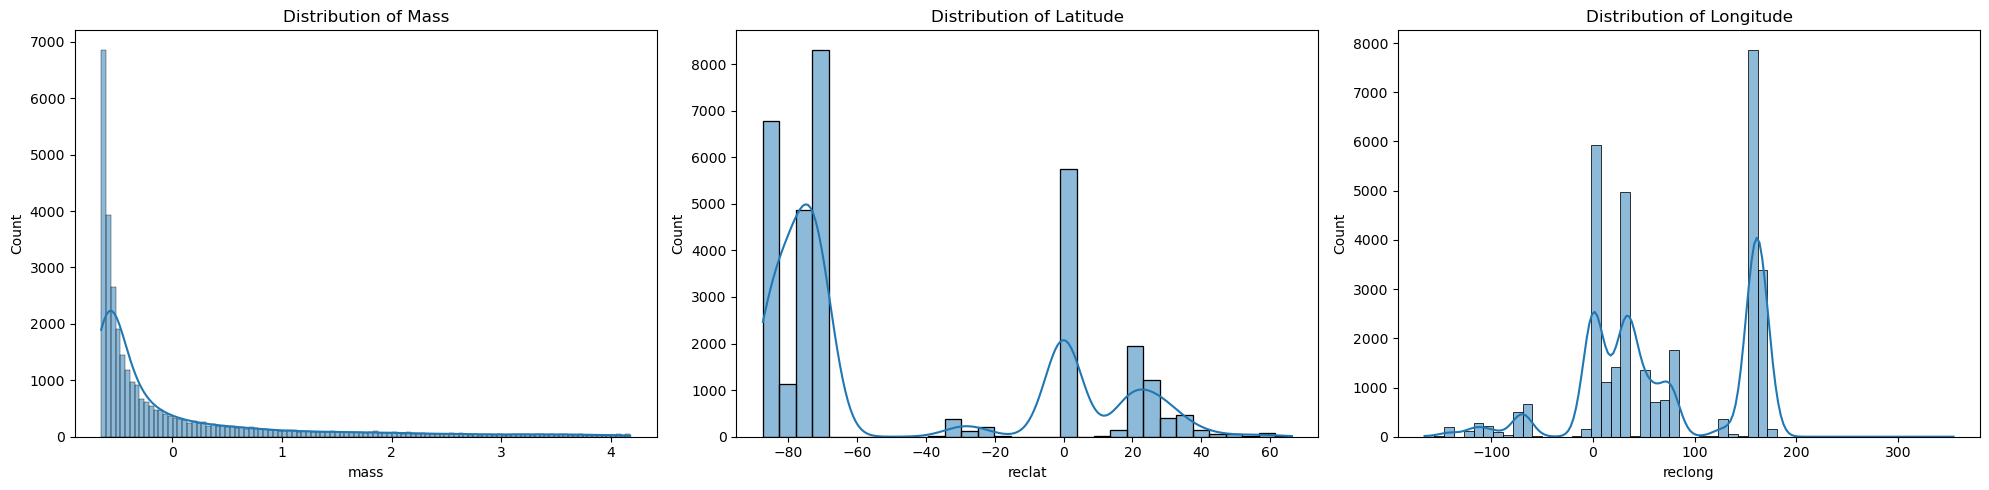

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Basic summary statistics
print("Summary Statistics:\n", data.describe(include='all'))

# Distribution of numerical columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(data['mass'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Mass')

sns.histplot(data['reclat'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Latitude')

sns.histplot(data['reclong'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Longitude')

plt.tight_layout()
plt.show()


In [10]:
# Distribution of 'fall'
fig = px.pie(data, names='fall', title='Distribution of Fall Types')
fig.show()

# Top 10 most common recclasses
top_recclasses = data['recclass'].value_counts().nlargest(10)
fig = px.bar(top_recclasses, x=top_recclasses.index, y=top_recclasses.values, title='Top 10 Most Common Recclasses')
fig.show()


In [11]:
# Group by year and count the number of falls
annual_falls = data.groupby('year').size()

# Plot the time series
fig = px.line(annual_falls, title='Time Series of Meteorite Falls')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Falls')

# Set the x-axis limits based on the dataset range
fig.update_xaxes(range=[1900, 2024])

# Show the corrected plot
fig.show()

In [12]:
# Sample a random number of landings between 1 and 100 for each meteorite
data['landing_count'] = np.random.randint(1, 101, size=len(data))

# Update the scatter plot using the 'landing_count' column for size/color
fig = px.scatter_geo(data, lat='reclat', lon='reclong', hover_name='name', color='recclass',
                     size='landing_count',        # Use 'landing_count' for size
                     title='Geographical Distribution (Landings per Meteorite)')
fig.update_geos(projection_type="natural earth")
fig.show()


c:\Users\KIIT\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [13]:
fig = px.box(data, x='recclass', y='mass', points='all', title='Mass Distribution by Recclass')

# Customize colors
fig.update_traces(marker_color='orange', marker_line_color='blue', marker_line_width=1.5, opacity=0.6)

# Layout adjustments
fig.update_layout(xaxis_title='Recclass', yaxis_title='Mass (log scale)', yaxis_type='log')

# Show the updated plot
fig.show()

In [14]:
import folium
from folium.plugins import HeatMap

# Create a map centered around the median latitude and longitude
m = folium.Map(location=[data['reclat'].median(), data['reclong'].median()], zoom_start=2)

# Add a heatmap layer with reduced opacity (adjust the value as needed)
heat_data = [[row['reclat'], row['reclong']] for index, row in data.iterrows()]
HeatMap(heat_data, opacity=0.5).add_to(m)  # You can change the opacity value here

# Display the map
m.save("heatmap.html")
m


In [14]:
data.head()

name    id  nametype       recclass      mass  fall    year  \
0            Aachen     1         1             L5 -0.425048     0  1880.0   
12  Aire-sur-la-Lys   425         1        Unknown -0.339116     0  1769.0   
17          Al Rais   446         1         CR2-an  1.051415     0  1957.0   
22  Alby sur Chéran   458         1  Eucrite-mmict  2.028642     0  2002.0   
38           Angers  2301         1             L6 -0.339116     0  1822.0   

      reclat   reclong             GeoLocation  landing_count  
0   50.77500   6.08333   (50.775000, 6.083330)             34  
12  50.66667   2.33333   (50.666670, 2.333330)             23  
17  24.41667  39.51667  (24.416670, 39.516670)             15  
22  45.82133   6.01533   (45.821330, 6.015330)             85  
38  47.46667  -0.55000  (47.466670, -0.550000)             56

In [15]:
#importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib  # For saving the model


In [16]:
from sklearn.preprocessing import OneHotEncoder
# Separate features and target variables
X = data[['reclat', 'reclong', 'mass', 'year']]
y = data[['reclat', 'reclong']]

# One-Hot Encode categorical features (if any exist in your data besides 'year')
categorical_features = ['recclass']  # Replace with your list of categorical features

# Check if there are any NaN values in categorical features
if data[categorical_features].isnull().sum().sum() > 0:
    print("Warning: NaN values detected in categorical features. Handling missing values...")
    data[categorical_features] = data[categorical_features].fillna('missing')

encoder = OneHotEncoder(sparse=False)
X_encoded_categorical = encoder.fit_transform(data[categorical_features])
X_encoded_categorical_df = pd.DataFrame(X_encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Combine numerical and encoded categorical features
X_encoded = pd.concat([X.reset_index(drop=True), X_encoded_categorical_df.reset_index(drop=True)], axis=1)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Ensure consistent data selection throughout your code
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the lengths to confirm they match
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")

c:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Length of X_train: 25704
Length of X_test: 6427
Length of y_train: 25704
Length of y_test: 6427


In [17]:
# Define and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.6329858527515029


In [19]:
# Save the model for future use
joblib.dump(model, 'meteorite_prediction_model.pkl')  # Replace with your desired filename
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

columns_order = X_encoded.columns.tolist()
joblib.dump(columns_order, 'columns_order.pkl')



['columns_order.pkl']

In [20]:
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the trained model
model = joblib.load('meteorite_prediction_model.pkl')

# Load the encoder, scaler, and columns order used during training
encoder = joblib.load('encoder.pkl')
scaler = joblib.load('scaler.pkl')
columns_order = joblib.load('columns_order.pkl')

# Define the function for prediction
def predict_meteorite_location(mass, year, reclat, reclong, recclass):
    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'mass': [mass],
        'year': [year],
        'reclat': [reclat],
        'reclong': [reclong],
        'recclass': [recclass]
    })

    # One-Hot Encode the categorical feature 'recclass'
    encoded_input_categorical = encoder.transform(input_data[['recclass']])
    encoded_input_categorical_df = pd.DataFrame(encoded_input_categorical, columns=encoder.get_feature_names_out(['recclass']))

    # Combine numerical and encoded categorical features
    input_encoded = pd.concat([input_data[['mass', 'year', 'reclat', 'reclong']].reset_index(drop=True), encoded_input_categorical_df.reset_index(drop=True)], axis=1)

    # Reorder the columns to match the training order
    input_encoded = input_encoded[columns_order]

    # Standardize the input features
    input_scaled = scaler.transform(input_encoded)

    # Make prediction
    prediction = model.predict(input_scaled)

    return prediction

# Test the function with a new set of data
mass = 5000  # example mass
year = 2024  # example year
reclat = 34.05  # example latitude
reclong = -118.25  # example longitude
recclass = 'H5'  # example recclass

predicted_location = predict_meteorite_location(mass, year, reclat, reclong, recclass)
print("Predicted Latitude and Longitude:", predicted_location)


Predicted Latitude and Longitude: [[  33.9848536 -117.1476399]]
